In [86]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import numpy as np
%matplotlib inline

In [87]:
def show_result(*imgs):
    for i, row in enumerate(imgs):
        plt.figure(figsize=(16, 10))
        for j, img in enumerate(row):
            plt.subplot(i+1, len(row), j+1)
            plt.imshow(img)
        plt.show()

In [88]:
# 1
def func_oper(img, operation):
    imgs = []
    for shape in [cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE, cv2.MORPH_RECT]:
        mid = []
        for s in [3, 5]:
            kr = cv2.getStructuringElement(shape, (s, s))
            for i in [1, 3, 5]:
                mid.append(getattr(cv2, operation)(img, kr, i))
        imgs.append(mid)
    return imgs

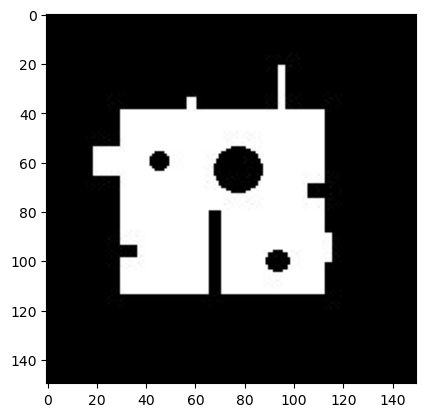

In [89]:
img = cv2.imread('Morph.jpg')
plt.imshow(img)

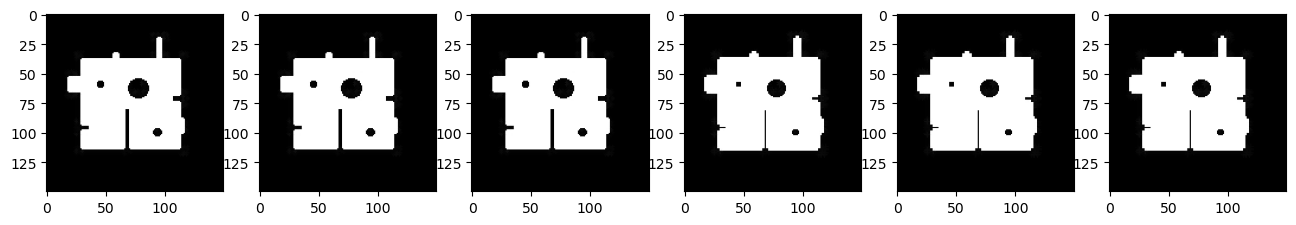

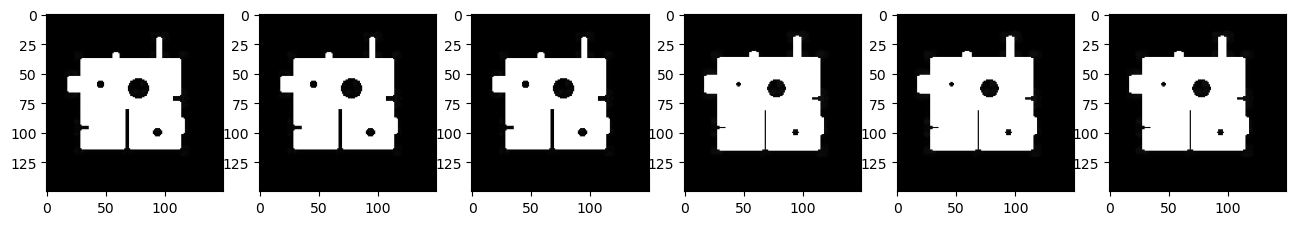

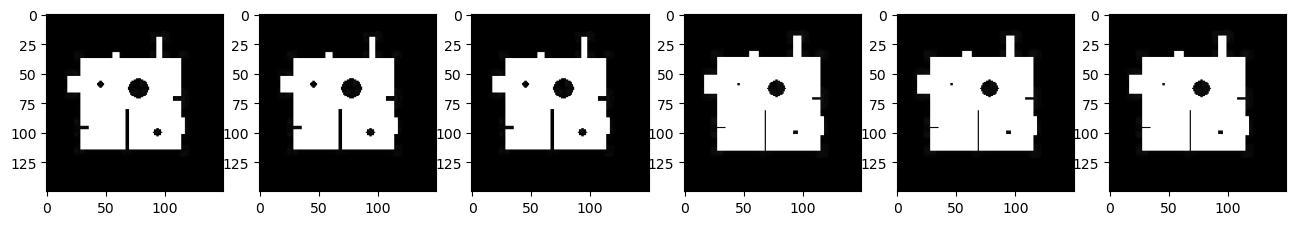

In [90]:
show_result(*func_oper(img, 'dilate'))

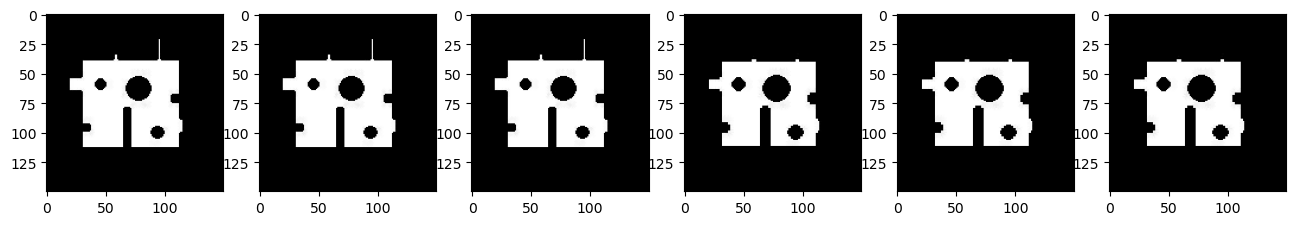

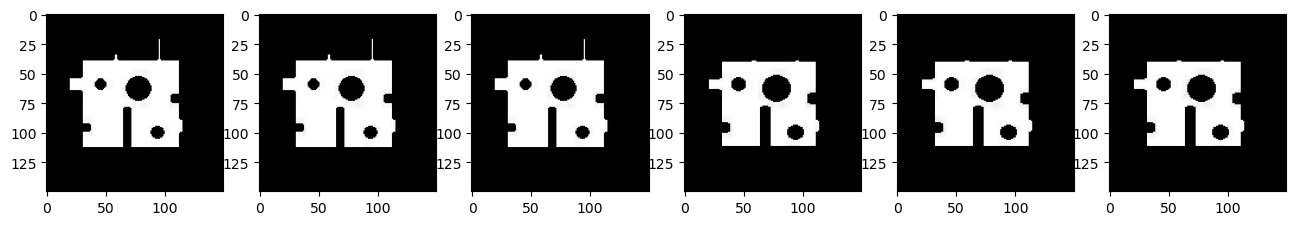

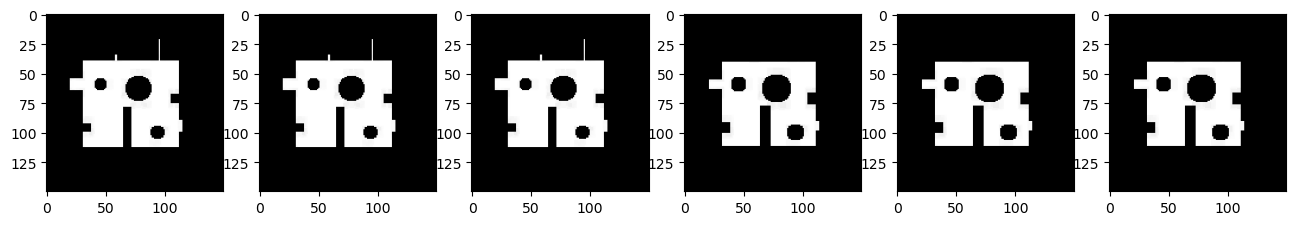

In [91]:
show_result(*func_oper(img, 'erode'))

In [92]:
# 2
def show_result_2img(img1, img2):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.show()

def act_func(img, kernel, operation='close'):
    method = f'MORPH_{operation.upper()}'
    mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel, kernel))
    return cv2.morphologyEx(img, getattr(cv2, method), mask, iterations=1)

In [93]:
img = cv2.imread('Morph.jpg')

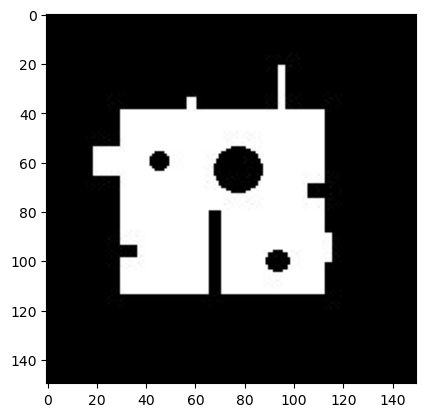

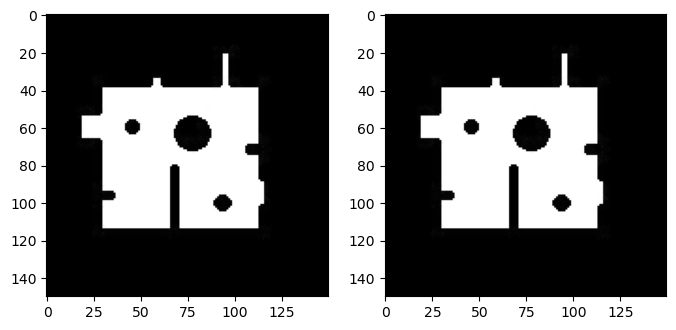

In [94]:
plt.imshow(img)

imgc1 = act_func(img, 3, 'close')
imgc2 = act_func(act_func(img, 3, 'dilate'), 3, 'erode')

show_result_2img(imgc1, imgc2)

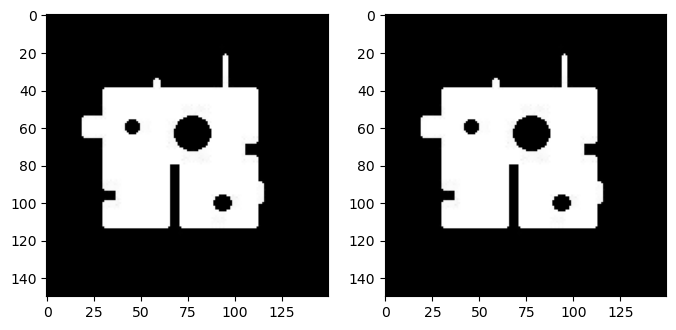

In [95]:
# 3
imgo1 = act_func(img, 3, 'open')
imgo2 = act_func(act_func(img, 3, 'erode'), 3, 'dilate')

show_result_2img(imgo1, imgo2)

In [96]:
# 4
img_fnames = ['Blobs 2.jpg', 'Blobs.jpg', 'Bri.jpg', 'Fingerprint.jpg', 'Morph.jpg', 'morph2.bmp', 'morph3.bmp', 'Truck.jpg']
imgs = []
for img_fname in img_fnames:
    img = cv2.imread(img_fname)
    imgs.append(img)

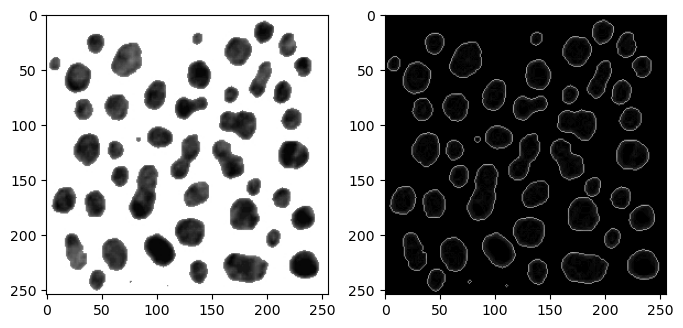

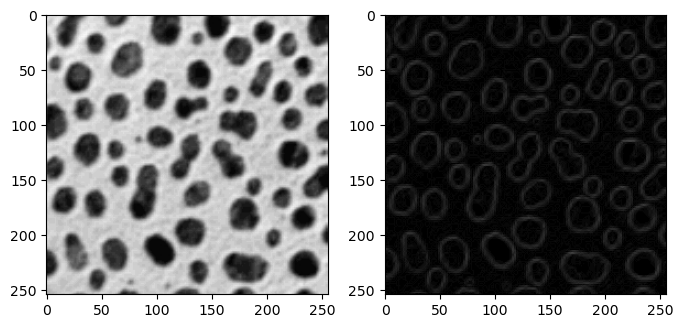

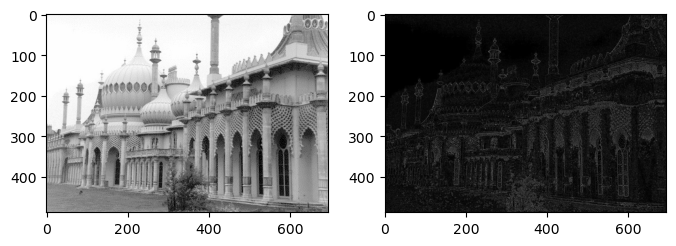

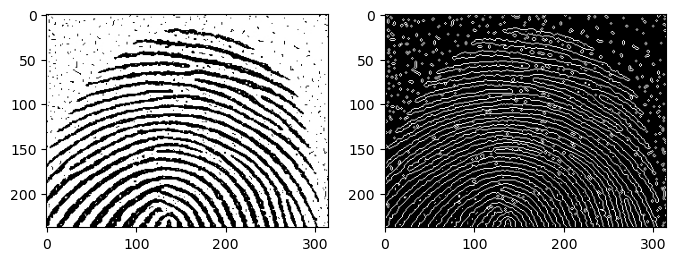

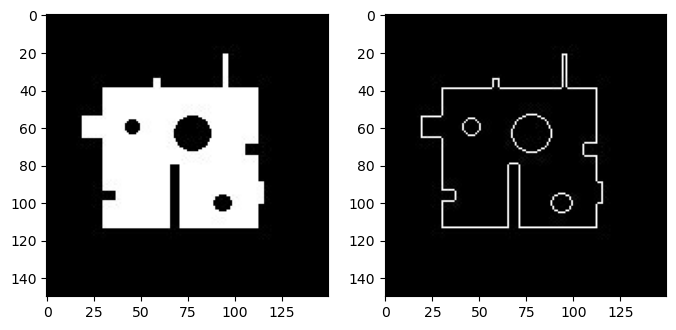

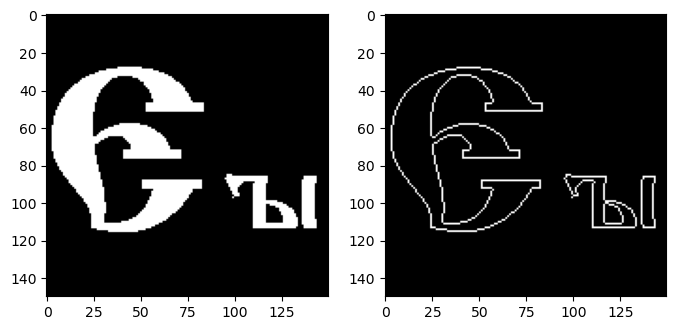

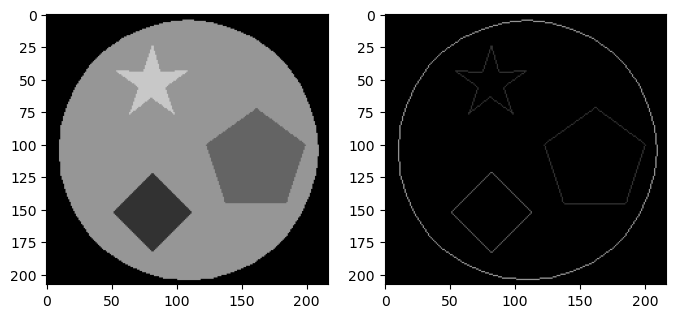

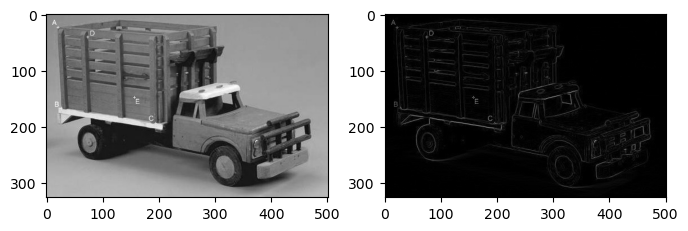

In [97]:
for img in imgs:
    imgb = img - act_func(img, 3, 'erode')
    show_result_2img(img, imgb)

In [98]:
# 5
def act_func2(img, kernel, struct='ellipse', operation='close'):
    method = f'MORPH_{operation.upper()}'
    struct = f'MORPH_{struct.upper()}'
    mask = cv2.getStructuringElement(getattr(cv2, struct), (kernel, kernel))
    return cv2.morphologyEx(img, getattr(cv2, method), mask, iterations=1)

In [99]:
img_M = cv2.imread('Morph.jpg')
img_M2 = cv2.imread('morph2.bmp')

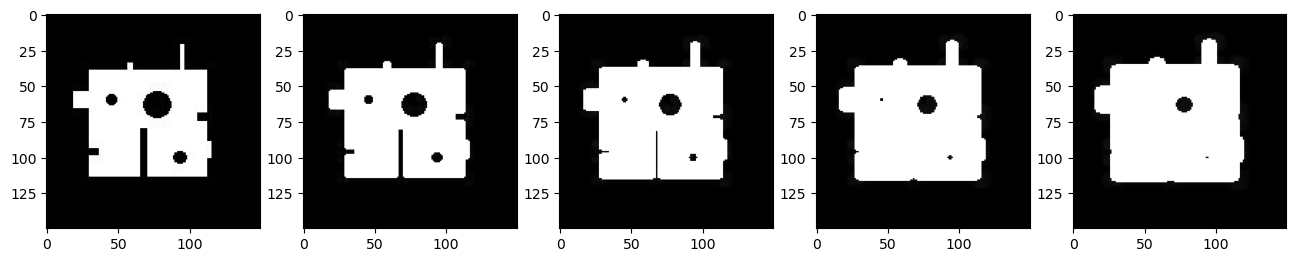

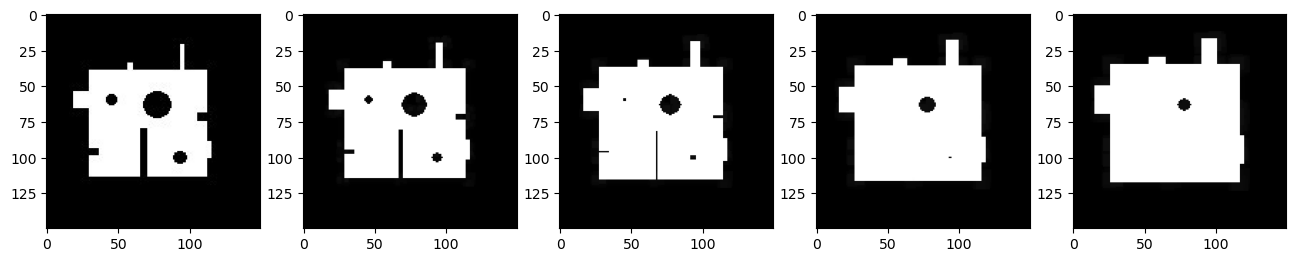

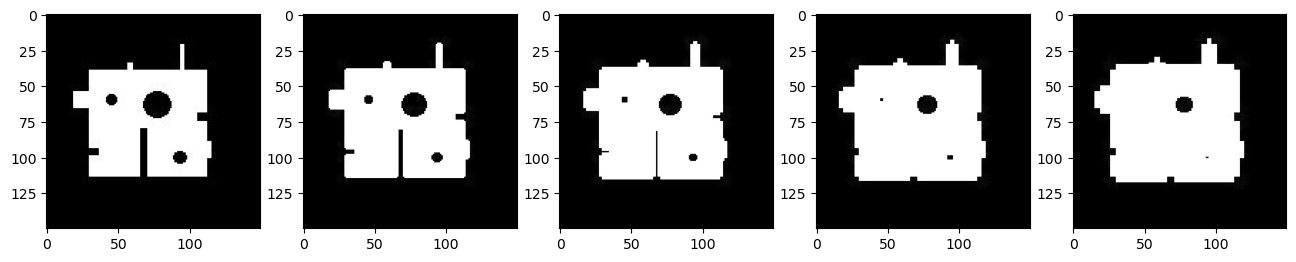

In [100]:
# Morph.jpg
for s in ['ellipse', 'rect', 'cross']:
    imgs_in = []
    for k in [1, 3, 5, 7, 9]:
        imgs_in.append(act_func2(img_M, k, s, operation='dilate'))
    show_result(imgs_in)

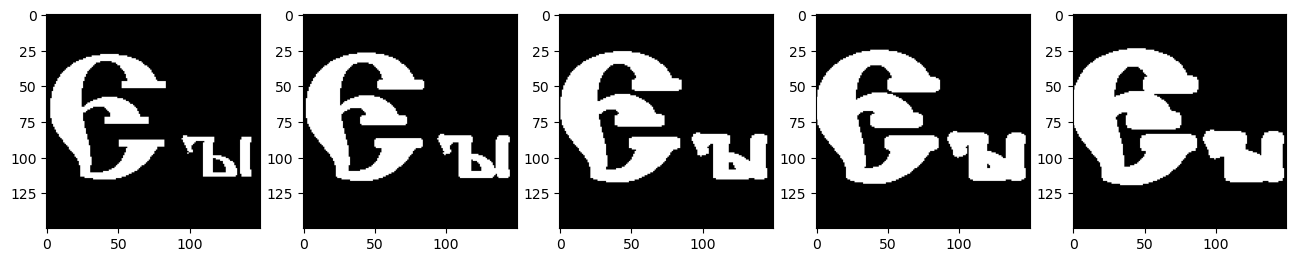

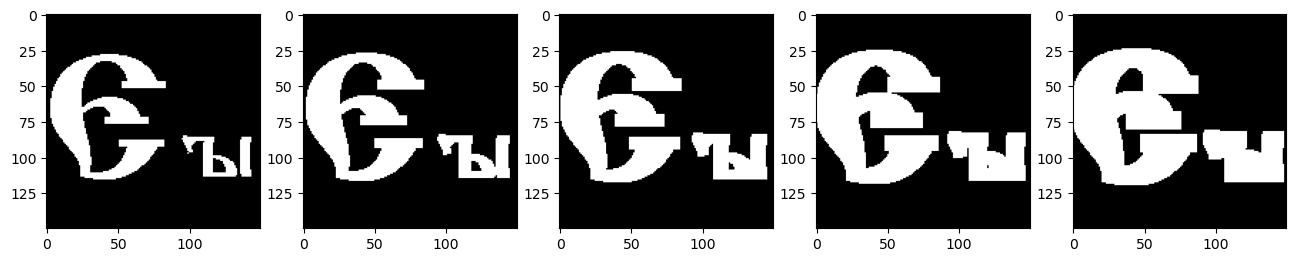

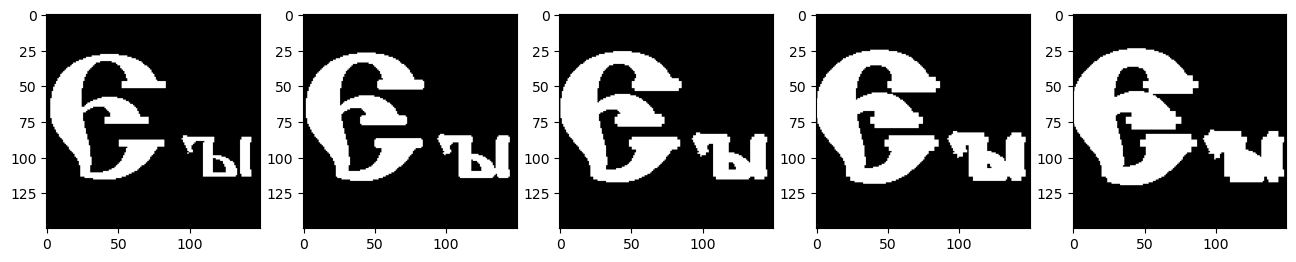

In [101]:
# morph2.bmp
for s in ['ellipse', 'rect', 'cross']:
    imgs_in = []
    for k in [1, 3, 5, 7, 9]:
        imgs_in.append(act_func2(img_M2, k, s, operation='dilate'))
    show_result(imgs_in)

Для сглаживания углов была выбрана операция дилатации. Результат улучшается при меньшем значении ядра, с формой структурного элемента - эллипс или крест.

In [102]:
# 6
img_M3 = cv2.imread('morph3.bmp')

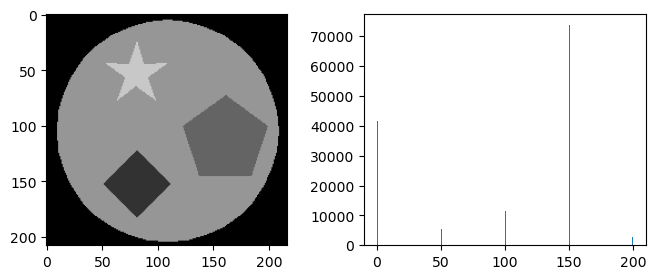

In [103]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_M3)
plt.subplot(1, 2, 2)
plt.hist(np.ravel(img_M3), bins=256)
plt.show()

In [104]:
def trans_func(x, p):
    return 0 if x in range(p-15, p+16) else 255

def transform(f, p, img):
    img_cp = img.copy()
    for i in range(len(img)):
        for j in range(len(img[i])):
            img_cp[i][j] = [f(px, p) for px in img[i][j]]
    return img_cp

def get_contur(img):
    return img - act_func(img, 3, 'erode')

def show_result_cnt(img_a, img_b):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img_a)
    plt.subplot(1, 2, 2)
    plt.imshow(img_b)
    plt.show()

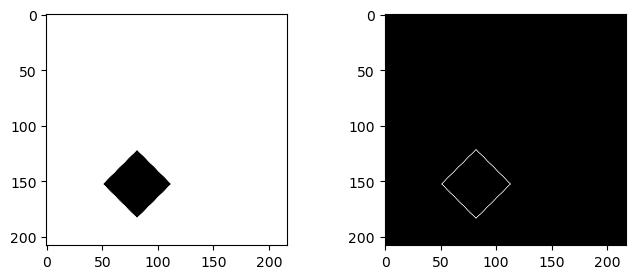

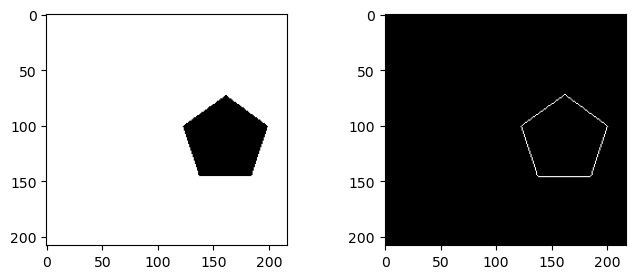

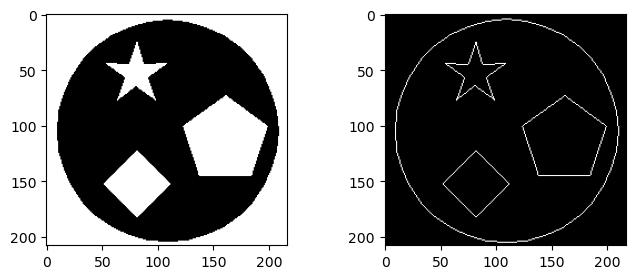

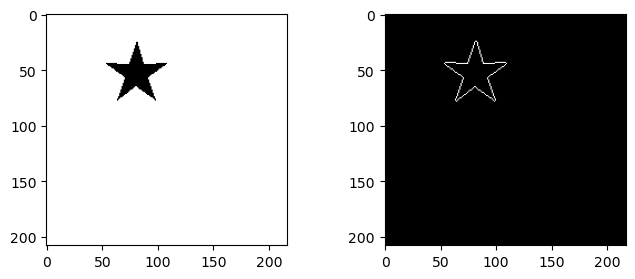

In [105]:
for t in [50, 100, 150, 200]:
    img_a = transform(trans_func, t, img_M3)
    img_b = get_contur(img_a)
    show_result_cnt(img_a, img_b)

In [106]:
# 7
img_F = cv2.imread('Fingerprint.jpg')

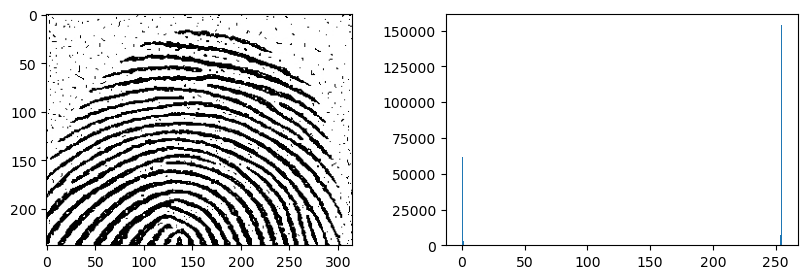

In [107]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.imshow(img_F)
plt.subplot(1, 2, 2)
plt.hist(np.ravel(img_F), bins=256)
plt.show()

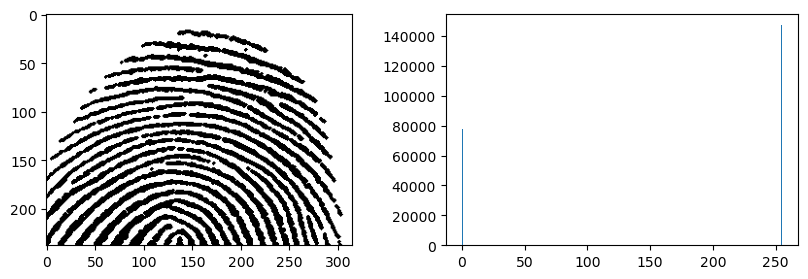

In [124]:
res_img = act_func2(img_F, 3, 'ellipse', 'dilate')
res_img = act_func2(res_img, 3, 'ellipse', 'erode')
res_img = act_func2(res_img, 2, 'ellipse', 'erode')
res_img = transform(trans_func, 0, res_img)
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.imshow(res_img)
plt.subplot(1, 2, 2)
plt.hist(np.ravel(res_img), bins=256)
plt.show()